<a href="https://colab.research.google.com/github/reyheneh/Gene-Expression-clustering/blob/main/Gene_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer, Dense
from keras.regularizers import l2
from keras import layers
from sklearn.mixture import GaussianMixture as GMM


In [ ]:
#load Data
Data2 = np.genfromtxt("/content/Spellman.csv", delimiter=',', skip_header=1)
Data2 = Data2[:,1:]


In [ ]:
#Autoencoder
encoding_dim = 3
# Model definition
input = keras.Input(shape=(23,))
encoded = Dense(18, activation='sigmoid')(input)
encoded = Dense(13, activation='sigmoid')(encoded)
encoded = Dense(encoding_dim, activation='sigmoid')(encoded)
decoded = Dense(13, activation='sigmoid')(encoded)
decoded = Dense(18, activation='sigmoid')(decoded)
decoded = Dense(23, activation='tanh')(decoded)
autoencoder = keras.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(Data2, Data2,epochs=50,batch_size=120,shuffle=False)

Epoch 1/50
37/37 [==============================] - 1s 4ms/step - loss: 0.2679
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1921
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1791
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1783
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1782
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1782
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1782
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1781
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1779
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1777
Epoch 11/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1774
Epoch 12/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1770
Epoch 13/50
37/37 [==============================

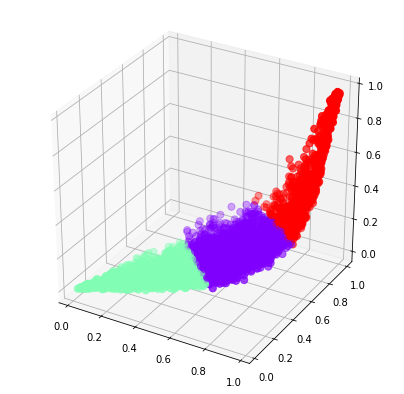

In [ ]:
from sklearn.cluster import KMeans
latent_model = keras.Model(input,encoded)
latent_all = latent_model(Data2)
est = KMeans(3)  # 3 clusters
est.fit(latent_all)
xkmeans = est.predict(latent_all)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(latent_all[:, 0], latent_all[:, 1],latent_all[:, 2], c=xkmeans, s=50, cmap='rainbow')
plt.show()

In [ ]:
#calculate average similarity measure of each cluster with its most similar cluster
from sklearn.metrics import davies_bouldin_score as dbs
DBS = dbs(latent_all,xkmeans)
print(DBS)

0.7047893078562463


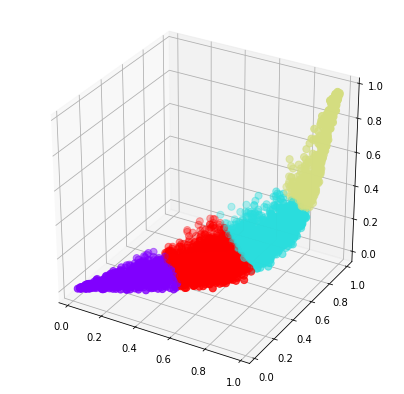

In [ ]:
# Kmeans clustering
from sklearn.cluster import KMeans
latent_model = keras.Model(input,encoded)
latent_all2 = latent_model(Data2)
est = KMeans(4)  # 4 clusters
est.fit(latent_all2)
xkmeans2 = est.predict(latent_all2)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(latent_all2[:, 0], latent_all2[:, 1],latent_all[:, 2], c=xkmeans2, s=50, cmap='rainbow')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score as dbs
DBS = dbs(latent_all2,xkmeans2)
print(DBS)

0.6768206098485642


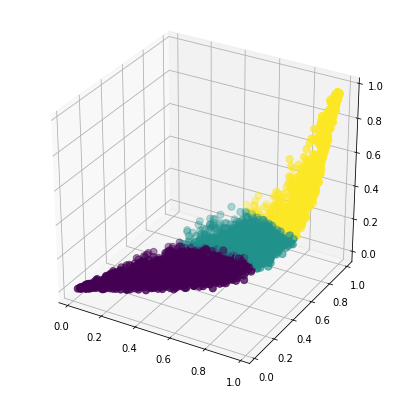

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
# Gaussian mixture model
X = np.array(latent_all)
#X = latent_all
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(latent_all)

labels = gmm.predict(latent_all)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1],latent_all[:, 2], c=labels, s=50, cmap='viridis')
plt.show()
probs = gmm.predict_proba(X)
print(probs[:5].round(3))


In [ ]:
from sklearn.metrics import davies_bouldin_score as dbs
DBS = dbs(X,labels)
print(DBS)

0.8034610018716354


In [ ]:
best_cluster = np.min([xkmeans, xkmeans2, xkmeans3, xkmeans4])